In [301]:
import glob
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

In [302]:
import utils
import metrics_utils

In [303]:
matplotlib.rcParams.update({'font.size': 15})

In [304]:
is_save = True
figsize = metrics_utils.get_figsize(is_save)

In [305]:
# hyperparameters that gave best validation error
# for ML, MAP and Ours

legend_base_regexs = [
#     ('ML',
#   '../estimated/celebA/full-input/gaussian/4.0/',
#   '/map/1.0_0.0_0.0_adam_0.01_0.9_2000_2'),
#     ('MAP-Tuned',
#   '../estimated_backup_old/celebA/full-input/gaussian/4.0/',
#   '/map/*'),
#                       ('Langevin-Tuned',
#   '../estimated_backup_old/celebA/full-input/gaussian/4.0/',
#   '/noisy/*'),
#     ('MAP',
#     '../estimated/celebA/full-input/circulant/4.0/',
#      '/realnvp/map/*'),
#                       ('Langevin',
#   '../estimated_backup_old/celebA/full-input/gaussian/4.0/',
#   '/langevin/*'),
    ('MAP',
    '../estimated/celebA/full-input/circulant/4.0/',
     '/realnvp/annealed_map/None*'),
#         ('Langevin',
#     '../estimated/celebA/full-input/circulant/4.0/',
#      '/realnvp/langevin/*'),
    ('Langevin',
    '../estimated/celebA/full-input/circulant/4.0/',
     '/realnvp/annealed_langevin/*')
                 ]

/home/ajil/work/cs-full/env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ajil/work/cs-full/env/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ajil/work/cs-full/env/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ajil/work/cs-full/env/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ajil/work/cs-full/env/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


../estimated/celebA/full-input/circulant/4.0/2500/realnvp/annealed_map/None_200.0_10.0_16.0_4.0_False_sgd_0.001_0.0_2000_1
../estimated/celebA/full-input/circulant/4.0/7500/realnvp/annealed_map/None_200.0_10.0_16.0_4.0_False_sgd_0.0005_0.0_2000_1
../estimated/celebA/full-input/circulant/4.0/1000/realnvp/annealed_map/None_200.0_10.0_12.0_4.0_False_sgd_0.001_0.0_2000_1
../estimated/celebA/full-input/circulant/4.0/200/realnvp/annealed_map/None_200.0_10.0_12.0_4.0_False_sgd_0.0005_0.0_2000_1
../estimated/celebA/full-input/circulant/4.0/500/realnvp/annealed_map/None_200.0_10.0_16.0_4.0_False_sgd_0.001_0.0_2000_1
../estimated/celebA/full-input/circulant/4.0/100/realnvp/annealed_map/None_200.0_10.0_16.0_4.0_False_sgd_0.001_0.0_2000_1
../estimated/celebA/full-input/circulant/4.0/5000/realnvp/annealed_map/None_200.0_10.0_20.0_4.0_False_sgd_0.0001_0.0_2000_1
../estimated/celebA/full-input/circulant/4.0/10000/realnvp/annealed_map/None_200.0_10.0_12.0_4.0_False_sgd_0.0001_0.0_2000_1
../estimated/c

/home/ajil/work/cs-full/env/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


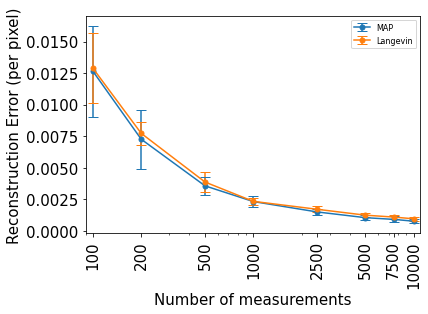

In [306]:
## Plot
retrieve = 'l2'
for crit in ['l2']:#, 'measurement']:
    pdf = PdfPages(f'../results/{retrieve}_error_nvp_criterion={crit}.pdf')
    plt.figure()
    criterion = [crit, 'mean']
    retrieve_list = [[retrieve, 'mean'], [retrieve, 'std']]
    legends = []
    colors = dict()

    for legend, base, regex in legend_base_regexs:
        colors[legend] = metrics_utils.plot(base, regex, criterion, retrieve_list, legend)

#     retrieve_list = [['measurement', 'mean'], ['measurement', 'std']]

#     for legend, base, regex in legend_base_regexs:
#         _ = metrics_utils.plot(base, regex, criterion, retrieve_list, legend + '-measurement-error',colors[legend])

    ## Prettify
    # axis
#     plt.gca().set_ylim([0,0.10])
    # plt.gca().set_ylim(bottom=0)
    plt.gca().set_xscale("log", nonposx='clip')
    plt.gca().set_xlim([90, 11000])
#     plt.gca().set_ylim([0, 0.01])

    # # labels, ticks, titles
    ticks = [100,200,500, 1000, 2500, 5000, 7500, 10000]#, 12288]
    labels = [100, 200, 500, 1000, 2500, 5000, 7500, 10000]#, 12288]
    plt.xticks(ticks, labels, rotation=90)
    plt.xticks(ticks, labels)
    if retrieve_list[0][0] == 'lpips':
        ylabel = 'LPIPS'
    elif retrieve_list[0][0] == 'l2':
        ylabel = 'Reconstruction Error (per pixel)'
    plt.ylabel(ylabel)
    plt.xlabel('Number of measurements')

    # Legends
    plt.legend(fontsize=8)


    pdf.savefig(bbox_inches='tight')
    pdf.close()


# pdf = PdfPages('../results/measurement_error_nvp.pdf')

# plt.figure()
# criterion = ['measurement', 'mean']
# retrieve_list = [['measurement', 'mean'], ['measurement', 'std']]
# legends = []
# for legend, base, regex in legend_base_regexs:
#     metrics_utils.plot(base, regex, criterion, retrieve_list,colors[legend])
#     legends.append(legend + '-training')
# criterion = ['validation', 'mean']
# retrieve_list = [['validation', 'mean'], ['validation', 'std']]
# for legend, base, regex in legend_base_regexs:
#     metrics_utils.plot(base, regex, criterion, retrieve_list,colors[legend])
#     legends.append(legend + '-validation')
    

# ## Prettify
# # axis
# # plt.gca().set_ylim([0,0.007])
# # plt.gca().set_ylim(bottom=0)
# plt.gca().set_xscale("log", nonposx='clip')
# plt.gca().set_xlim([400, 13000])

# # # labels, ticks, titles
# ticks = [500, 1000, 2500, 5000, 7500, 10000, 12288]
# labels = [500, 1000, 2500, 5000, 7500, 10000, 12288]
# plt.xticks(ticks, labels, rotation=90)
# plt.xticks(ticks, labels)
# plt.ylabel('Measurement error')
# plt.xlabel('Number of measurements')

# # Legends
# plt.legend(legends, fontsize=8)

# pdf.savefig(bbox_inches='tight')
# pdf.close()

In [88]:

from utils import load_if_pickled

In [295]:
temp = load_if_pickled('../estimated/celebA/full-input/circulant/4.0/100/realnvp/annealed_langevin/0.5_None_200.0_10.0_16.0_4.0_False_sgd_0.0005_0.0_2000_1/l2_losses.pkl')

In [296]:
values = np.array(list(temp.values()))

In [297]:
values

array([0.012206  , 0.0112872 , 0.00867736, 0.00784519, 0.01310253,
       0.01099766, 0.01245197, 0.01777749, 0.03273111, 0.01271339,
       0.01821818, 0.01038118, 0.01452297, 0.01672887, 0.02085219,
       0.01027882, 0.00969366, 0.01213773, 0.02363896, 0.01199134])

In [298]:
values.mean()

0.014411689425690336

In [199]:
for i in temp.keys():
    print(np.linalg.norm(temp[i]))

0.015248430953086778
0.023255870796414977
0.022125187258511883
0.012740447816633624
0.012694946038486874
0.016741832996439058
0.024644407603847857
0.02120990588570132
0.04791081471077132
0.026547582875258265


In [121]:
temp

{0: 0.1051919162273407,
 1: 0.14535313844680786,
 2: 0.059680525213479996,
 3: 0.1276225596666336,
 4: 0.1418321132659912}

In [ ]:
import lpips
device = 'cuda'
percept = lpips.PerceptualLoss(
        model="net-lin", net="vgg", use_gpu=device.startswith("cuda")
)



In [35]:
from torchvision import transforms, datasets


In [65]:
import torch
mse = torch.nn.MSELoss(reduction='mean')

In [69]:
trans = transforms.Compose([transforms.Resize((64,64)), transforms.ToTensor()])
dataloader1 = iter(datasets.ImageFolder('../test_images/celeba/', transform=trans))
dataloader2 = iter(datasets.ImageFolder('../estimated/celebA/full-input/gaussian/5.477/2000/map/', transform=trans))
dataloader3 = iter(datasets.ImageFolder('../estimated/celebA/full-input/gaussian/5.477/2000/langevin/', transform=trans))

for i in range(5):
    orig = next(dataloader1)[0].cuda()
    map = next(dataloader2)[0].cuda()
    lang = next(dataloader3)[0].cuda()
    print(f'{i}\t map_percept:{percept(orig, map).sum()}  langevin_percept: {percept(orig,lang).sum()} ')


0	 map_percept:0.31998181343078613  langevin_percept: 0.11813697218894958 
1	 map_percept:0.3180534839630127  langevin_percept: 0.140338733792305 
2	 map_percept:0.10434599220752716  langevin_percept: 0.08586662262678146 
3	 map_percept:0.31631267070770264  langevin_percept: 0.12930646538734436 
4	 map_percept:0.2639092206954956  langevin_percept: 0.13965316116809845 


In [70]:
trans = transforms.Compose([transforms.Resize((64,64)), transforms.ToTensor()])
dataloader1 = iter(datasets.ImageFolder('../test_images/celeba/', transform=trans))
dataloader2 = iter(datasets.ImageFolder('../estimated/celebA/full-input/gaussian/5.477/2000/map/', transform=trans))
dataloader3 = iter(datasets.ImageFolder('../estimated/celebA/full-input/gaussian/5.477/2000/langevin/', transform=trans))

for i in range(5):
    orig = next(dataloader1)[0].cuda()
    map = next(dataloader2)[0].cuda()
    lang = next(dataloader3)[0].cuda()
    print(f'{i}\t map_mse:{mse(orig, map).sum()} langevin_mse: {mse(orig,lang).sum()}')


0	 map_mse:0.00491326255723834 langevin_mse: 0.0027664639055728912
1	 map_mse:0.003174141049385071 langevin_mse: 0.00251996167935431
2	 map_mse:0.0025677059311419725 langevin_mse: 0.002614569151774049
3	 map_mse:0.0029670456424355507 langevin_mse: 0.002129434607923031
4	 map_mse:0.0033182241022586823 langevin_mse: 0.002693063812330365


In [62]:
for i in range(5):
    orig = next(dataloader1)[0].cuda()
    map = next(dataloader2)[0].cuda()
    lang = next(dataloader3)[0].cuda()
    print(f'{i}\t ')

StopIteration: 

In [36]:
16/5000

0.0032

In [38]:
64/12288

0.005208333333333333

In [39]:
32/5000

0.0064